In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_neutral_mutations(file):
    with open(file, 'rb') as pf:
        data = pickle.load(pf)
    
    neutral_mutations = data.n_neutral_over_generations[1:]
    neutral_mutations_proportions = np.array(neutral_mutations) / data.target_population_size
    
    plt.plot(neutral_mutations_proportions)
    plt.show()

In [3]:
def plot_mutation_beneficiality(file):
    with open(file, 'rb') as pf:
        data = pickle.load(pf)
    

    pairs_over_gens = data.parent_child_fitness_history[1:]
    prop_beneficial = [len([pair for pair in gen if pair[0] > pair[1]]) / len(gen) for gen in pairs_over_gens]
    prop_neutral = [len([pair for pair in gen if pair[0] == pair[1]]) / len(gen) for gen in pairs_over_gens]
    prop_deleterious = [len([pair for pair in gen if pair[0] < pair[1]]) / len(gen) for gen in pairs_over_gens]
    plt.plot(prop_beneficial, label='beneficial')
    plt.plot(prop_neutral, label='neutral')
    plt.plot(prop_deleterious, label='deleterious')
    plt.xlabel('Generations')
    plt.legend()
    plt.show()

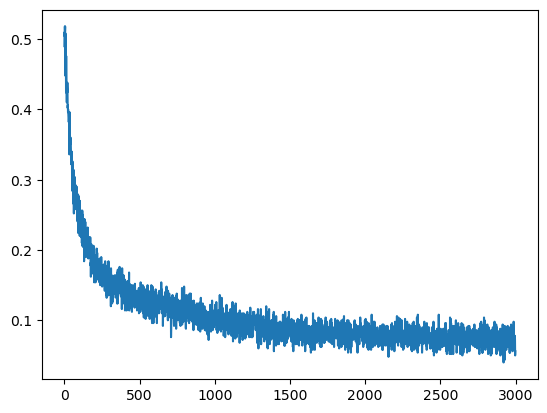

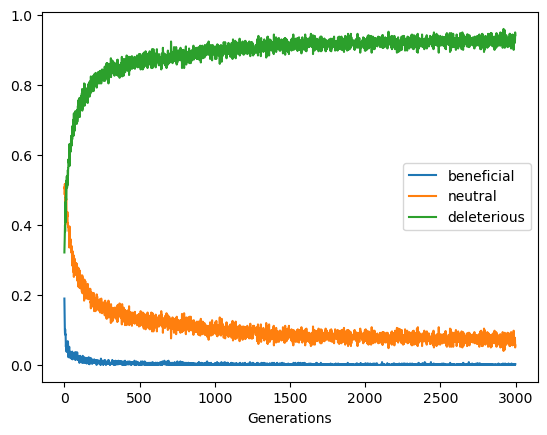

In [4]:
plot_neutral_mutations('./hillclimber_test_t0.pkl')
plot_mutation_beneficiality('./hillclimber_test_t0.pkl')

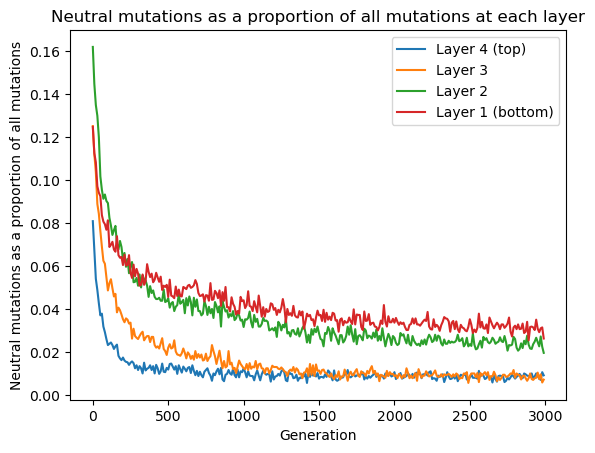

In [60]:
from collections import Counter
def compress_array(arr, N):
    # Calculate the number of chunks
    num_chunks = len(arr) // N
    
    # Initialize the compressed array
    compressed = []
    
    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate the average of the current chunk
        avg = sum(arr[i*N:(i+1)*N]) / N
        
        # Append the average to the compressed array
        compressed.append(avg)
    
    # Handle the case where the original array size is not a multiple of N
    # by averaging the remaining elements, if any
    remainder = len(arr) % N
    if remainder != 0:
        avg_remainder = sum(arr[-remainder:]) / remainder
        compressed.append(avg_remainder)
    
    return compressed


def plot_multiscale_neutrality(file):
    with open(file, 'rb') as pf:
        hc = pickle.load(pf)

    l1_neutral = []
    l2_neutral = []
    l3_neutral = []
    l4_neutral = []
    
    for gen in range(0, len(hc.mutation_data_over_generations)-1):
        neutral = [pair[0] == pair[1] for pair in hc.parent_child_fitness_history[gen+1]]

        layers_neutral = np.array(hc.mutation_data_over_generations[gen]['layer'])[neutral]
        neutral_count = Counter(layers_neutral)
        if 0 in neutral_count:
            l1_neutral.append(neutral_count[0] / hc.target_population_size)
        if 1 in neutral_count:
            l2_neutral.append(neutral_count[1]/ hc.target_population_size)
        if 2 in neutral_count:
            l3_neutral.append(neutral_count[2]/ hc.target_population_size)
        else:
            l3_neutral.append(0)
        if 3 in neutral_count:
            l4_neutral.append(neutral_count[3]/ hc.target_population_size)
        else:
            l4_neutral.append(0)

    gen_avg = 10
    time_avg_l1 = compress_array(l1_neutral, gen_avg)
    time_avg_l2 = compress_array(l2_neutral, gen_avg)
    time_avg_l3 = compress_array(l3_neutral, gen_avg)
    time_avg_l4 = compress_array(l4_neutral, gen_avg)

    x_vals = range(0, len(hc.mutation_data_over_generations)-1, gen_avg)

    plt.plot(x_vals, time_avg_l4, label='Layer 4 (top)')
    plt.plot(x_vals, time_avg_l3, label='Layer 3')
    plt.plot(x_vals, time_avg_l2, label='Layer 2')
    plt.plot(x_vals, time_avg_l1, label='Layer 1 (bottom)')
    plt.legend()

    plt.xlabel('Generation')
    plt.ylabel('Neutral mutations as a proportion of all mutations')
    plt.title('Neutral mutations as a proportion of all mutations at each layer')
        

plot_multiscale_neutrality('./hillclimber_test_t0.pkl')

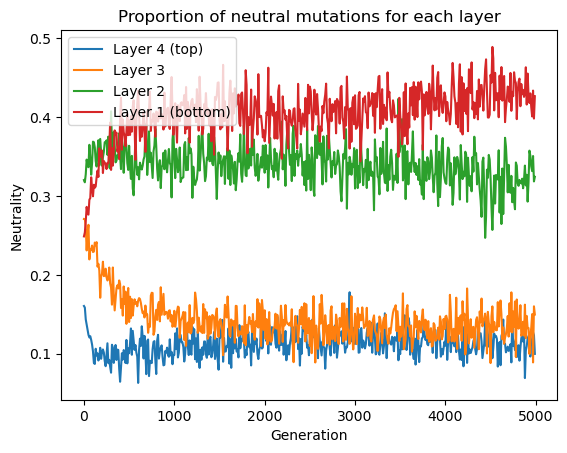

In [90]:
def plot_normalized_multiscale_neutrality(file):
    with open(file, 'rb') as pf:
        hc = pickle.load(pf)

    l1_neutral = []
    l2_neutral = []
    l3_neutral = []
    l4_neutral = []
    
    for gen in range(0, len(hc.mutation_data_over_generations)-1):
        hc.mutation_data_over_generations[gen]['layer']
        hc.parent_child_distance_history[gen+1]

        neutral = [pair[0] == pair[1] for pair in hc.parent_child_fitness_history[gen+1]]
        n_neutral = sum(neutral)

        layers_neutral = np.array(hc.mutation_data_over_generations[gen]['layer'])[neutral]
        neutral_count = Counter(layers_neutral)
        if 0 in neutral_count:
            l1_neutral.append(neutral_count[0] / n_neutral)
        if 1 in neutral_count:
            l2_neutral.append(neutral_count[1] / n_neutral)
        if 2 in neutral_count:
            l3_neutral.append(neutral_count[2] / n_neutral)
        else:
            l3_neutral.append(0)
        if 3 in neutral_count:
            l4_neutral.append(neutral_count[3] / n_neutral)
        else:
            l4_neutral.append(0)

    gen_avg = 10
    time_avg_l1 = compress_array(l1_neutral, gen_avg)
    time_avg_l2 = compress_array(l2_neutral, gen_avg)
    time_avg_l3 = compress_array(l3_neutral, gen_avg)
    time_avg_l4 = compress_array(l4_neutral, gen_avg)

    x_vals = range(0, len(hc.mutation_data_over_generations)-1, gen_avg)

    plt.plot(x_vals, time_avg_l4, label='Layer 4 (top)')
    plt.plot(x_vals, time_avg_l3, label='Layer 3')
    plt.plot(x_vals, time_avg_l2, label='Layer 2')
    plt.plot(x_vals, time_avg_l1, label='Layer 1 (bottom)')

    plt.xlabel('Generation')
    plt.ylabel('Neutrality')
    plt.title('Proportion of neutral mutations for each layer')

    plt.legend(loc='upper left')
        

# plot_normalized_multiscale_neutrality('./hillclimber_test_t0.pkl')
plot_normalized_multiscale_neutrality('./hc_testeroni_5000_wo.pkl')

In [ ]:
from collections import Counter

def plot_multiscale_neutrality(file):
    with open(file, 'rb') as pf:
        hc = pickle.load(pf)

    parent_pop_keys = list(hc.parent_population.keys())
    sol = hc.parent_population[parent_pop_keys[0]]
    print(Counter(hc.mutation_data_over_generations[1]['kind']))
    print(sol.get_layer_state_indices(0))
    print(sol.get_layer_state_indices(1))
    print(sol.get_layer_state_indices(2))
    print(sol.get_layer_state_indices(3))

    print(sol.state_genotype)
    

plot_multiscale_neutrality('./hillclimber_test_t0.pkl')

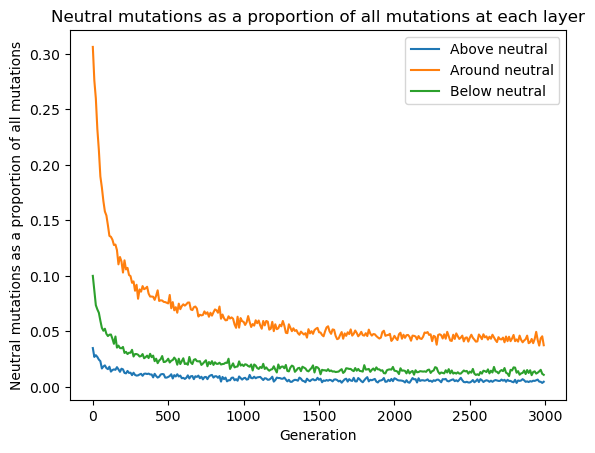

In [64]:
def plot_multiscale_neutrality_mutation_kind(file):
    with open(file, 'rb') as pf:
        hc = pickle.load(pf)

    above_neutral = []
    around_neutral = []
    below_neutral = []
    
    for gen in range(0, len(hc.mutation_data_over_generations)-1):
        neutral = [pair[0] == pair[1] for pair in hc.parent_child_fitness_history[gen+1]]

        kind_neutral = np.array(hc.mutation_data_over_generations[gen]['kind'])[neutral]

        neutral_count = Counter(kind_neutral)
        if 'above' in neutral_count:
            above_neutral.append(neutral_count['above'] / hc.target_population_size)
        else:
            above_neutral.append(0)

        if 'below' in neutral_count:
            below_neutral.append(neutral_count['below']/ hc.target_population_size)
        else:
            below_neutral.append(0)

        if 'around' in neutral_count:
            around_neutral.append(neutral_count['around']/ hc.target_population_size)
        else:
            around_neutral.append(0)

    gen_avg = 10
    time_avg_above = compress_array(above_neutral, gen_avg)
    time_avg_around = compress_array(around_neutral, gen_avg)
    time_avg_below = compress_array(below_neutral, gen_avg)

    x_vals = range(0, len(hc.mutation_data_over_generations)-1, gen_avg)

    plt.plot(x_vals, time_avg_above, label='Above neutral')
    plt.plot(x_vals, time_avg_around, label='Around neutral')
    plt.plot(x_vals, time_avg_below, label='Below neutral')

    plt.legend()

    plt.xlabel('Generation')
    plt.ylabel('Neutral mutations as a proportion of all mutations')
    plt.title('Neutral mutations as a proportion of all mutations at each layer')
        

plot_multiscale_neutrality_mutation_kind('./hillclimber_test_t0.pkl')

Counter({'around': 309, 'below': 130, None: 41, 'above': 21})
Counter({'around': 307, 'below': 122, None: 41, 'above': 31})
Counter({'around': 311, 'below': 134, None: 33, 'above': 23})
Counter({'around': 303, 'below': 131, None: 36, 'above': 31})
Counter({'around': 299, 'below': 131, None: 42, 'above': 29})
Counter({'around': 305, 'below': 127, None: 46, 'above': 23})
Counter({'around': 294, 'below': 130, None: 49, 'above': 28})
Counter({'around': 306, 'below': 133, 'above': 32, None: 30})
Counter({'around': 313, 'below': 113, None: 42, 'above': 33})
Counter({'around': 336, 'below': 102, None: 35, 'above': 28})
Counter({'around': 311, 'below': 117, None: 50, 'above': 23})
Counter({'around': 308, 'below': 121, None: 43, 'above': 29})
Counter({'around': 324, 'below': 106, None: 48, 'above': 23})
Counter({'around': 328, 'below': 104, None: 38, 'above': 31})
Counter({'around': 296, 'below': 143, None: 40, 'above': 22})
Counter({'around': 322, 'below': 112, None: 35, 'above': 32})
Counter(

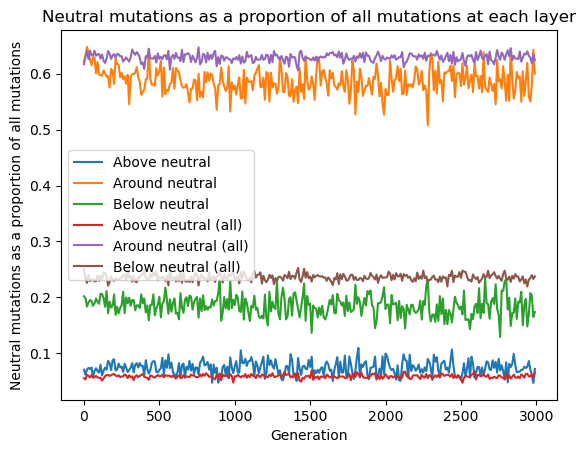

In [69]:
def plot_multiscale_neutrality_mutation_kind_normalized(file):
    with open(file, 'rb') as pf:
        hc = pickle.load(pf)

    above_neutral = []
    around_neutral = []
    below_neutral = []

    all_above = []
    all_around = []
    all_below = []
    
    for gen in range(0, len(hc.mutation_data_over_generations)-1):
        neutral = [pair[0] == pair[1] for pair in hc.parent_child_fitness_history[gen+1]]
        n_neutral = sum(neutral)

        kinds = Counter(hc.mutation_data_over_generations[gen]['kind'])
        print(kinds)
        if 'above' in kinds:
            all_above.append(kinds['above'] / hc.target_population_size)
        else:
            all_above.append(0)
        if 'around' in kinds:
            all_around.append(kinds['around'] / hc.target_population_size)
        else:
            all_around.append(0)
        if 'below' in kinds:
            all_below.append(kinds['below'] / hc.target_population_size)
        else:
            all_below.append(0)

        kind_neutral = np.array(hc.mutation_data_over_generations[gen]['kind'])[neutral]

        neutral_count = Counter(kind_neutral)
        if 'above' in neutral_count:
            above_neutral.append(neutral_count['above'] / n_neutral)
        else:
            above_neutral.append(0)

        if 'below' in neutral_count:
            below_neutral.append(neutral_count['below']/ n_neutral)
        else:
            below_neutral.append(0)

        if 'around' in neutral_count:
            around_neutral.append(neutral_count['around']/ n_neutral)
        else:
            around_neutral.append(0)

    gen_avg = 10
    time_avg_above = compress_array(above_neutral, gen_avg)
    time_avg_around = compress_array(around_neutral, gen_avg)
    time_avg_below = compress_array(below_neutral, gen_avg)

    time_avg_all_above = compress_array(all_above, gen_avg)
    time_avg_all_around = compress_array(all_around, gen_avg)
    time_avg_all_below = compress_array(all_below, gen_avg)

    x_vals = range(0, len(hc.mutation_data_over_generations)-1, gen_avg)

    plt.plot(x_vals, time_avg_above, label='Above neutral')
    plt.plot(x_vals, time_avg_around, label='Around neutral')
    plt.plot(x_vals, time_avg_below, label='Below neutral')

    plt.plot(x_vals, time_avg_all_above, label='Above neutral (all)')
    plt.plot(x_vals, time_avg_all_around, label='Around neutral (all)')
    plt.plot(x_vals, time_avg_all_below, label='Below neutral (all)')

    plt.legend()

    plt.xlabel('Generation')
    plt.ylabel('Neutral mutations as a proportion of all mutations')
    plt.title('Neutral mutations as a proportion of all mutations at each layer')
        

plot_multiscale_neutrality_mutation_kind_normalized('./hillclimber_test_t0.pkl')

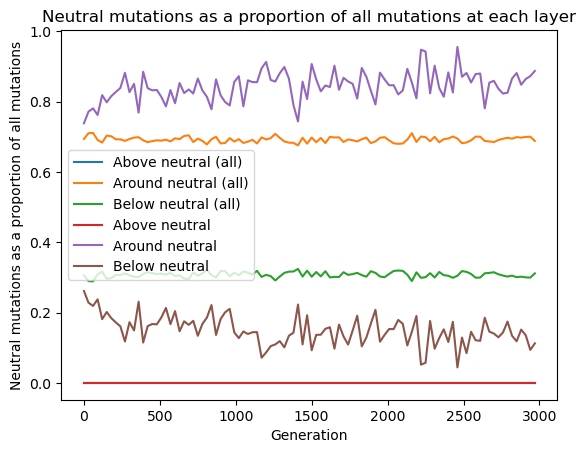

In [85]:
def plot_multiscale_neutrality_mutation_kind_normalized_by_layer(file, layer):
    with open(file, 'rb') as pf:
        hc = pickle.load(pf)

    all_above = []
    all_around = []
    all_below = []

    above_neutral = []
    around_neutral = []
    below_neutral = []
    
    for gen in range(0, len(hc.mutation_data_over_generations)-1):
        neutral = [pair[0] == pair[1] for pair in hc.parent_child_fitness_history[gen+1]]
        n_neutral = sum(neutral)

        layer_kind_pairs = list(zip(hc.mutation_data_over_generations[gen]['kind'], hc.mutation_data_over_generations[gen]['layer']))
        layer_kind = Counter(layer_kind_pairs)
    
        n_layer_mutations = layer_kind[('above', layer)] + layer_kind[('around', layer)] + layer_kind[('below', layer)]
        all_above.append(layer_kind[('above', layer)] / n_layer_mutations)
        all_around.append(layer_kind[('around', layer)] / n_layer_mutations)
        all_below.append(layer_kind[('below', layer)] / n_layer_mutations)

        neutral_layer_kind = Counter([pair for i, pair in enumerate(layer_kind_pairs) if neutral[i] and pair[1] == layer])
        n_layer_neutral_mutations = sum(neutral_layer_kind.values())
        if n_layer_neutral_mutations == 0:
            above_neutral.append(0)
            around_neutral.append(0)
            below_neutral.append(0)
            continue

        above_neutral.append(neutral_layer_kind[('above', layer)] / n_layer_neutral_mutations)
        around_neutral.append(neutral_layer_kind[('around', layer)] / n_layer_neutral_mutations)
        below_neutral.append(neutral_layer_kind[('below', layer)] / n_layer_neutral_mutations)



        # neutral_count = Counter(kind_neutral)

    gen_avg = 30
    # print(above_neutral)
    time_avg_all_above = compress_array(all_above, gen_avg)
    time_avg_all_around = compress_array(all_around, gen_avg)
    time_avg_all_below = compress_array(all_below, gen_avg)

    time_avg_above = compress_array(above_neutral, gen_avg)
    time_avg_around = compress_array(around_neutral, gen_avg)
    time_avg_below = compress_array(below_neutral, gen_avg)

    x_vals = range(0, len(hc.mutation_data_over_generations)-1, gen_avg)

    plt.plot(x_vals, time_avg_all_above, label='Above neutral (all)')
    plt.plot(x_vals, time_avg_all_around, label='Around neutral (all)')
    plt.plot(x_vals, time_avg_all_below, label='Below neutral (all)')

    plt.plot(x_vals, time_avg_above, label='Above neutral')
    plt.plot(x_vals, time_avg_around, label='Around neutral')
    plt.plot(x_vals, time_avg_below, label='Below neutral')

    plt.legend()

    plt.xlabel('Generation')
    plt.ylabel('Neutral mutations as a proportion of all mutations')
    plt.title('Neutral mutations as a proportion of all mutations at each layer')
        

plot_multiscale_neutrality_mutation_kind_normalized_by_layer('./hillclimber_test_t0.pkl', layer=3)

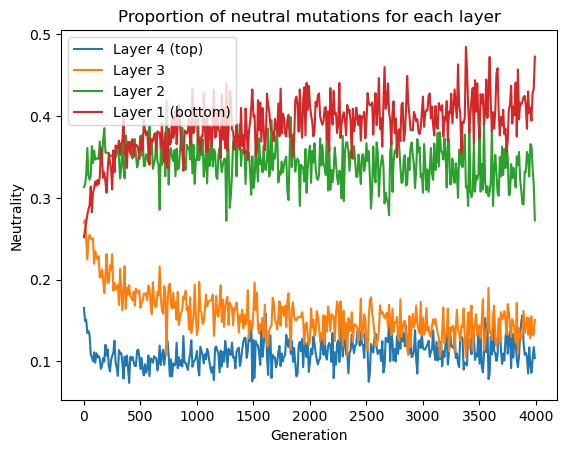

In [91]:
plot_normalized_multiscale_neutrality('./hc_testeroni_4000.pkl')